<a href="https://colab.research.google.com/github/sakamototaisei/python_pf_colabo/blob/main/PF_mplfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pythonのmplfinanceで株価のローソク足チャートを描く方法**

元々はmpl_financeというライブラリがありましたが、こちらはすでに廃止されて、今はmplfinanceの使用が推奨されています

## **株価のローソク足データを取得する**

In [8]:
import yfinance as yf

df = yf.download("7203.T", start="2021-01-01", end="2021-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1606.000000,1606.000000,1578.400024,1585.599976,1503.690674,21387000
2021-01-05,1570.000000,1582.400024,1559.199951,1562.400024,1481.689209,29285500
2021-01-06,1566.800049,1575.400024,1559.400024,1563.599976,1482.827148,21993000
2021-01-07,1582.000000,1582.400024,1563.599976,1563.599976,1482.827148,28129500
2021-01-08,1564.800049,1587.800049,1564.400024,1587.800049,1505.777222,30802500


In [9]:
df.drop('Adj Close', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,1606.000000,1606.000000,1578.400024,1585.599976,21387000
2021-01-05,1570.000000,1582.400024,1559.199951,1562.400024,29285500
2021-01-06,1566.800049,1575.400024,1559.400024,1563.599976,21993000
2021-01-07,1582.000000,1582.400024,1563.599976,1563.599976,28129500
2021-01-08,1564.800049,1587.800049,1564.400024,1587.800049,30802500


## **mplfinanceでローソク足チャートを描く**

mplfinanceでチャートを描く際には、引数として渡すDataFrameを指定された形式に整えておく必要があります。


*   indexを日付データにする
*   列は左から順番にOpen, High, Low, Closeとする
*   出来高を追加する場合はCloseの右にVolumeを追加する

In [11]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.5 MB/s eta 0:00:00


mplfinance.plotを使えば、1行でローソク足チャートを描くことができます。

ローソク足チャートを描くためには、typeをcandleに指定する必要があります

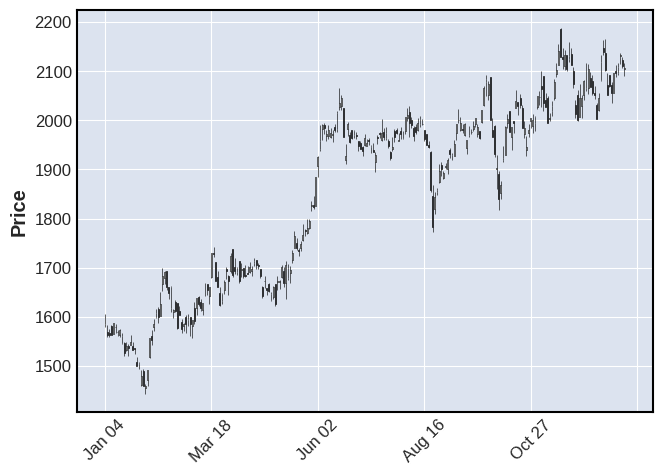

In [12]:
import mplfinance as mpf
 
mpf.plot(df, type="candle")

## **営業日のみのデータが表示される**

mplfinanceはこの心配は不要で、自動的に営業日のみ表示されるようになります。

## **typeでローソク足チャート以外の表現が可能**


typeを変更すれば、ローソク足チャート以外の方法でチャートを描くことができます。

*   ohlc(4本値: default設定)
*   candle(ローソク足チャート)
*   line(折れ線グラフ)
*   renko(練行足チャート)
*   pnf(PnFチャート)

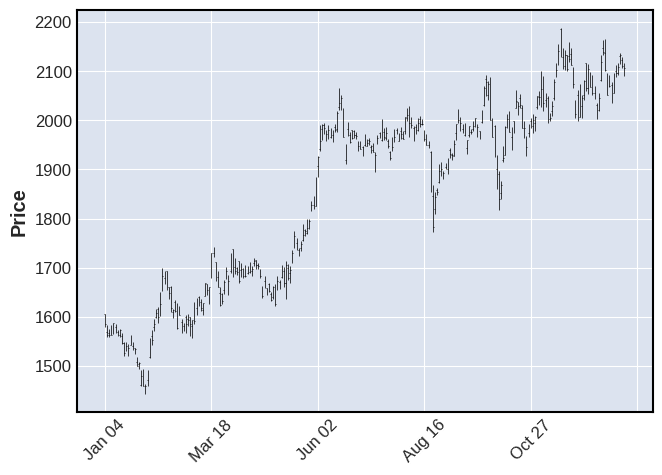

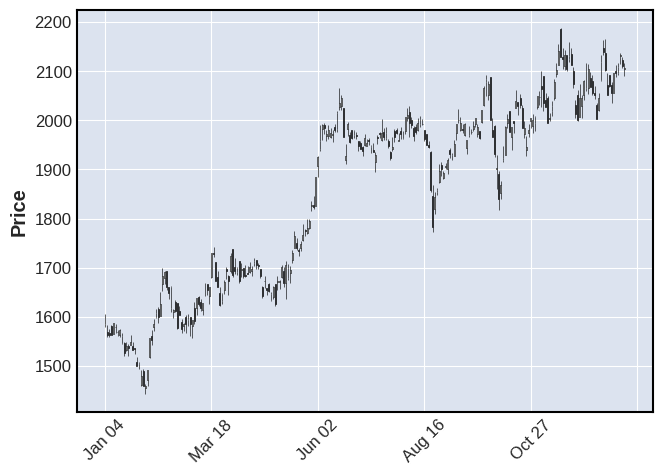

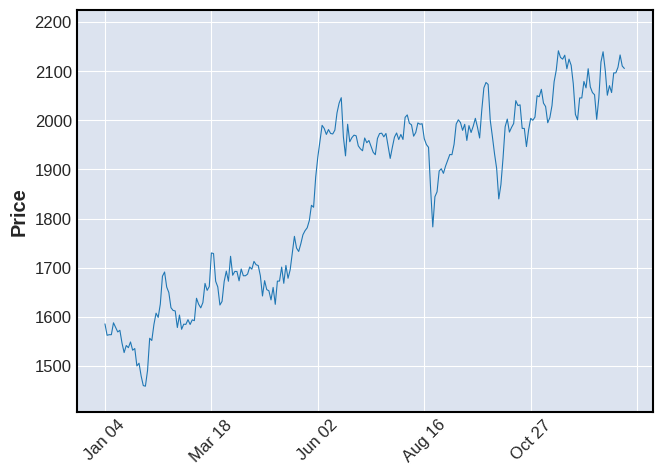

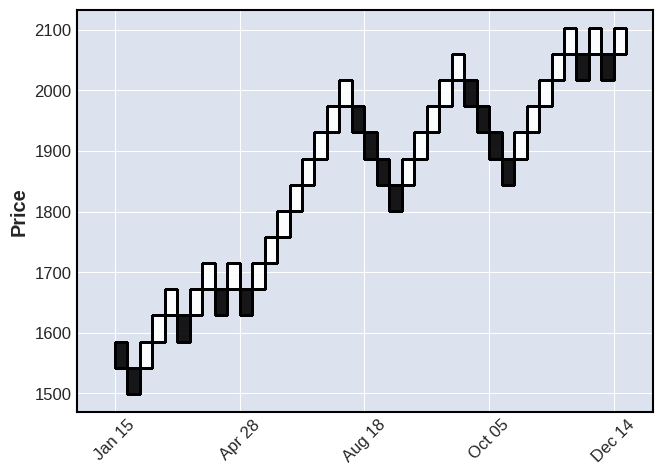

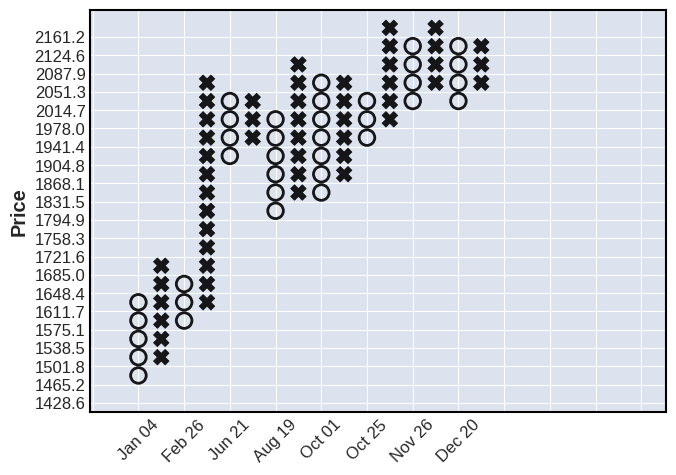

In [13]:
mpf.plot(df, type="ohlc")
mpf.plot(df, type="candle")
mpf.plot(df, type="line")
mpf.plot(df, type="renko")
mpf.plot(df, type="pnf")

## **styleでチャートの見た目を簡単に変更できる**

さらに注目すべき点として、styleという引数があります。

これを指定するとチャートの見た目をガラリを変更することができます。


*   classic
*   charles
*   mike
*   blueskies
*   starsandstripes
*   brasil
*   yahoo
*   binance

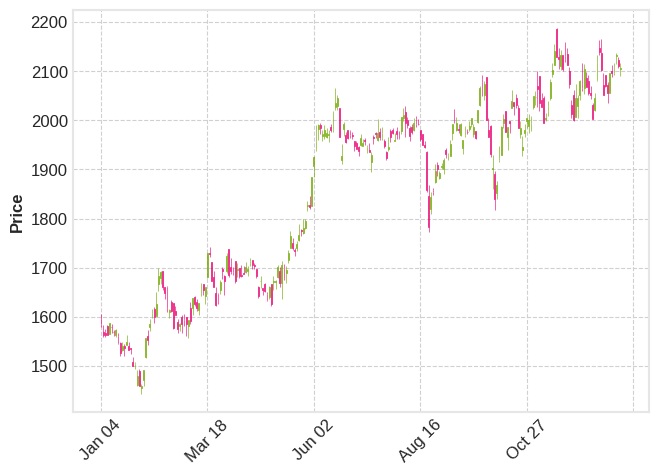

In [14]:
mpf.plot(df, type="candle", style="binance")

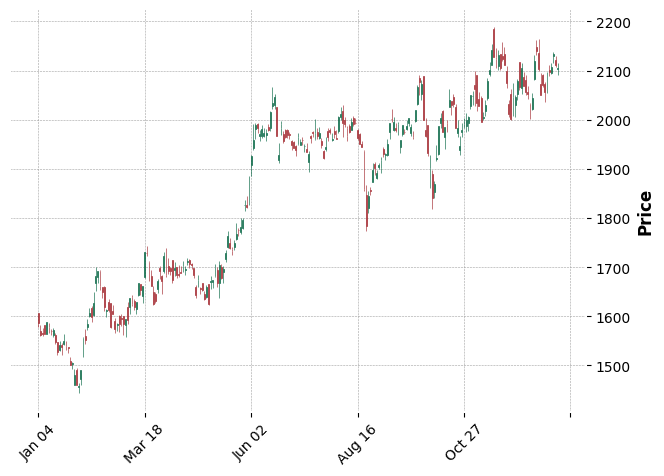

In [15]:
mpf.plot(df, type="candle", style="charles")

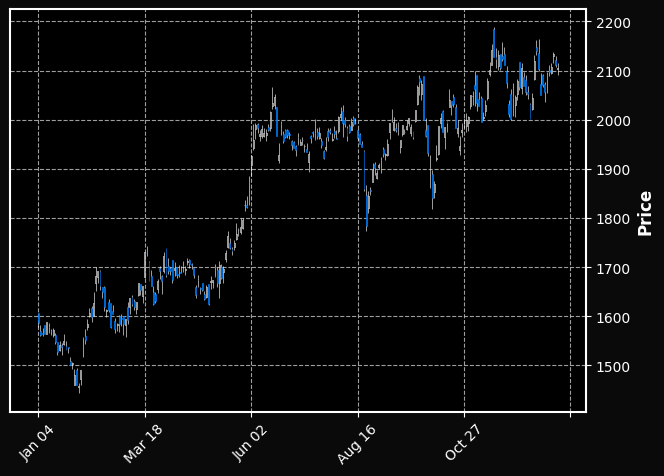

In [16]:
mpf.plot(df, type="candle", style="mike")

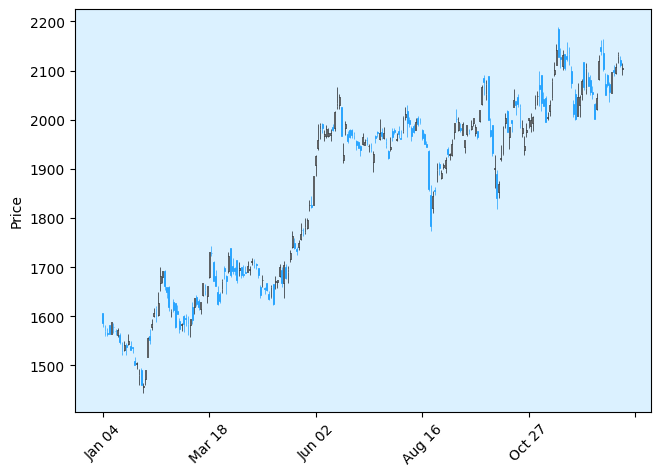

In [17]:
mpf.plot(df, type="candle", style="blueskies")

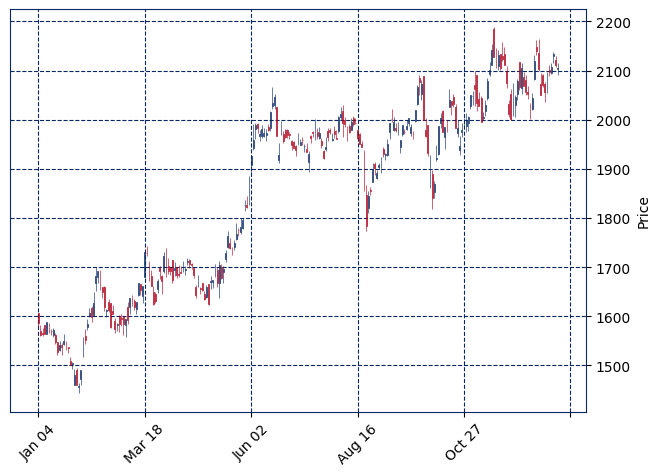

In [18]:
mpf.plot(df, type="candle", style="starsandstripes")

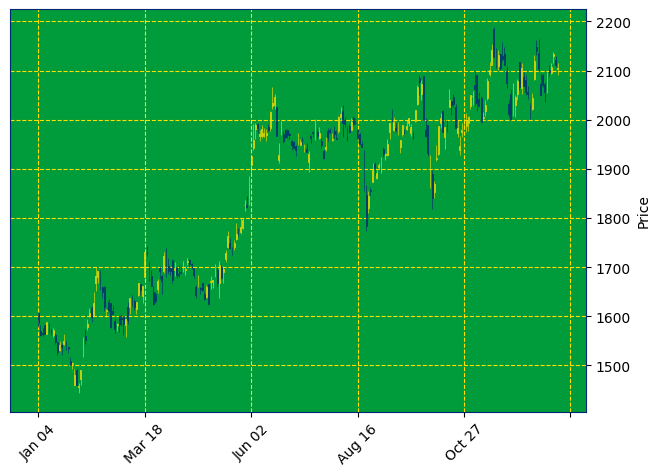

In [19]:
mpf.plot(df, type="candle", style="brasil")

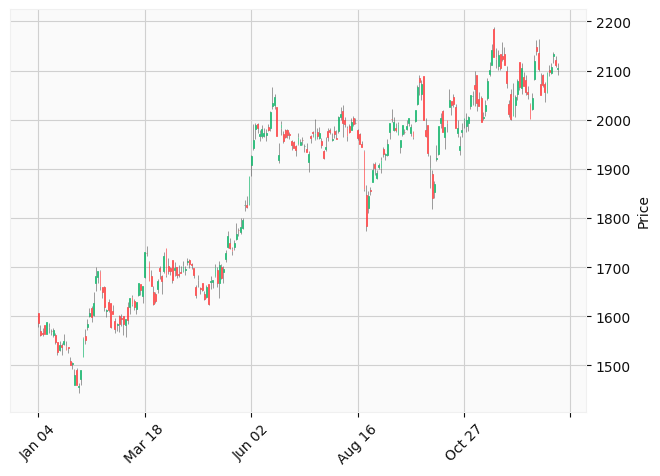

In [20]:
mpf.plot(df, type="candle", style="yahoo")

## **色は独自に指定することも可能**

styleを指定すると簡単に見た目を変更することができますが、こだわりとかがあって細かくカスタマイズしたい場合には、直接色の指定をすることも可能です。

次の例では、ローソク足の色を細かく指定しています。

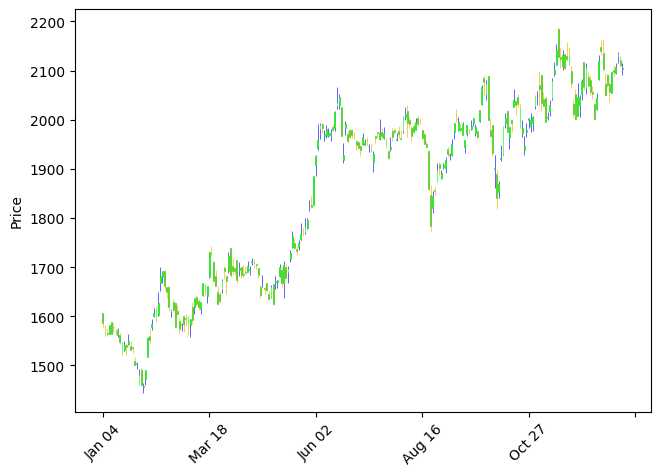

In [21]:
import mplfinance as mpf
 
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)
 
mpf.plot(df, type="candle", style=s)

mpf.make_marketcolorsで色を細かく指定することができます。

mpf.make_mpf_styleで指定した設定を読み込ませ、plotでstyleに指定すればOKです。

 

このように、好みのスタイルが見つからない場合は、マニュアルで自由に設定することもできます。

## **日付やラベルのフォーマットを変更する**

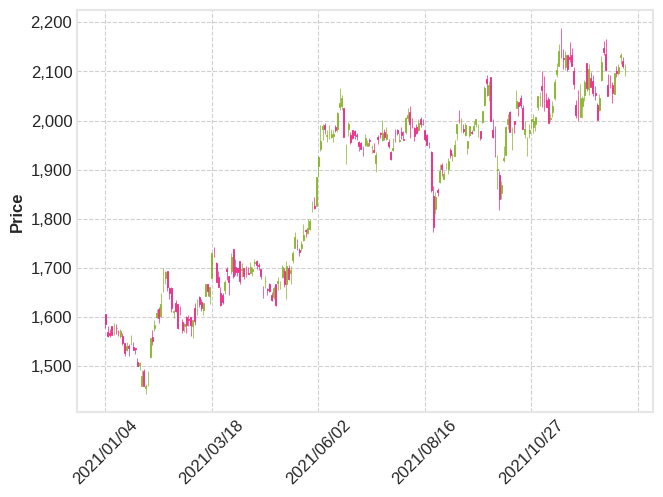

In [23]:
import mplfinance as mpf
import matplotlib
 
fig, ax = mpf.plot(df, type="candle", style="binance", datetime_format="%Y/%m/%d", returnfig=True)
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

日付のフォーマットは、plotのdatetime_formatで指定することができます。

数値データをカンマ区切りにするためには、plotにreturnfig=Trueとしてfigとaxを受け取ります。

 

axはリスト形式になっているので、最初の値を指定してmatplotlib.ticker.FuncFormatterでカンマ区切りに指定することができます。

これでだいぶ見やすくなります。

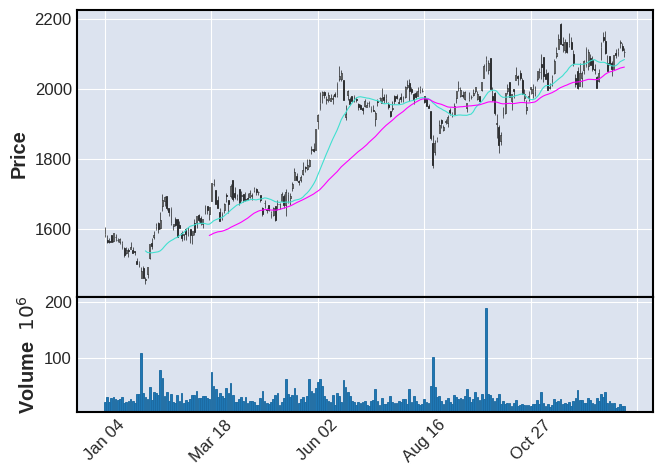

In [25]:
mpf.plot(df, type='candle', mav=(20, 50), volume=True)